In [ ]:
import numpy as np
from scipy.ndimage import median_filter, binary_erosion, label
from skimage import morphology

def anomaly_map(input_image, reconstruct_image, filter_size=5):

    anomaly_map = np.abs(input_image - reconstruct_image)
    """
    Post-process the anomaly map to reduce false positives.

    Parameters:
    - anomaly_map: 3D numpy array representing the anomaly map.
    - brain_mask: 3D numpy array representing the brain mask.
    - threshold: Threshold for preserving high residual parts.
    - filter_size: Size of the median filter(5*5*5).

    Returns:
    - processed_map: Processed anomaly map after post-processing steps.
    """

    # Apply 3D median filter
    anomaly_map = median_filter(anomaly_map, size=(filter_size, filter_size, filter_size))

    # Multiply anomaly map with eroded and truncated brain mask
    #eroded_mask = binary_erosion(brain_mask, iterations=1)
    # eroded_mask = binary_erosion(brain_mask)

    # anomaly_map *= eroded_mask

    # # Thresholding to preserve high residual parts
    # anomaly_map[anomaly_map < threshold] = 0

    # # Connected component analysis
    # labeled_map, num_features = label(anomaly_map)

    # # Remove small connected components
    # sizes = np.bincount(labeled_map.ravel())
    # mask_sizes = sizes > 1  # Keep components with size greater than 1
    # mask_sizes[0] = 0  # Background
    # final_map = mask_sizes[labeled_map]

    return  anomaly_map


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Charger le fichier npy
file_path = "/content/drive/MyDrive/Groupe1/preprocessed_data2/LungImagesHealthy.npy"
images = np.load(file_path)


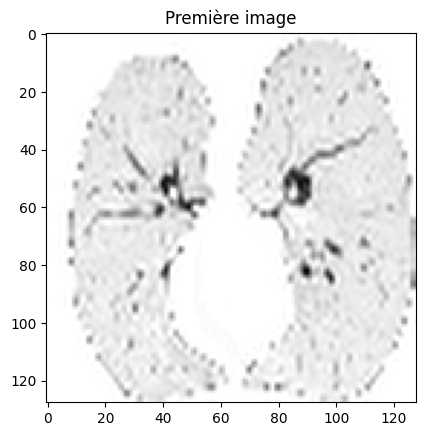

Taille de l'image : (32, 128, 128)


In [ ]:
# Afficher la première image
first_image = images[0]
plt.imshow(first_image[16, :, :], cmap='binary')  # Assurez-vous d'utiliser la colormap appropriée
plt.title('Première image')
plt.show()

# Afficher la taille de l'image
image_shape = first_image.shape
print(f'Taille de l\'image : {image_shape}')

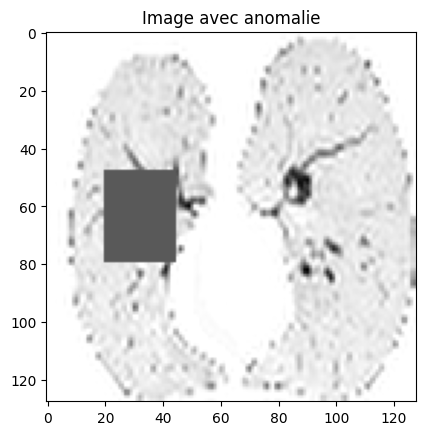

Taille de l'image : (32, 128, 128)


In [ ]:
import matplotlib.pyplot as plt

# Copie de l'image originale
image_with_anomaly = first_image.copy()

# Définition des coordonnées de la région de l'anomalie
x_start, x_end = 20, 45
y_start, y_end = 48, 80
z_start, z_end = 8, 24

# Augmentation de la valeur des pixels dans la région de l'anomalie
image_with_anomaly[z_start:z_end, y_start:y_end, x_start:x_end] = 0.6
# Affichage de l'image avec anomalie
plt.imshow(image_with_anomaly[16, :, :], cmap='binary')

plt.title('Image avec anomalie')
# plt.colorbar()
plt.show()

# Afficher la taille de l'image
image_shape = image_with_anomaly.shape
print(f'Taille de l\'image : {image_shape}')


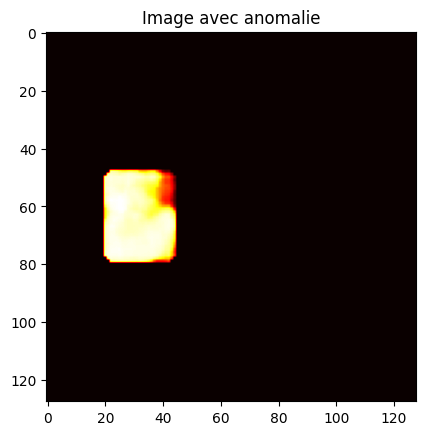

Taille de l'image : (32, 128, 128)


In [ ]:
map = anomaly_map(first_image, image_with_anomaly)
plt.imshow(map[16, :, :], cmap='hot')  # Assurez-vous d'utiliser la colormap appropriée

plt.title('Image avec anomalie')
# plt.colorbar()
plt.show()

# Afficher la taille de l'image
image_shape = image_with_anomaly.shape
print(f'Taille de l\'image : {image_shape}')